In [7]:
from qcodes.instrument.base import Instrument
from labcodes.drivers.Keysight_P9373A import Keysight_P9373A

import qcodes as qc
import os
import time
from datetime import date

from qcodes.dataset.measurements import Measurement  # , DataSaver
from qcodes.dataset.plotting import plot_by_id
# , experiments, load_experiment
from qcodes.dataset.experiment_container import load_experiment_by_name, new_experiment
import matplotlib.pyplot as plt
import numpy as np

from qcodes.dataset.sqlite.database import initialise_or_create_database_at
from qcodes.dataset.experiment_container import load_or_create_experiment

# init the vna

In [8]:
vna_name = 'VNA_Keysight'
# this is a qcodes VisaInstrument (interface between visa and qcodes)
vna_class = Keysight_P9373A
vna_address = "TCPIP0::maip-franck::hislip0,4880::INSTR"

# -- check if instrument 'VNA' already exists. If not, create it
if Instrument.exist(vna_name, vna_class):
    # an instrument is created by qcodes in a global context,
    # from which it can be retrieved manually using find_instrument
    vna = Instrument.find_instrument(
        vna_name, vna_class)
    
else:
    vna = vna_class(vna_name, vna_address,
                    300e3, 13.5e9, -90, 13, 2)


In [9]:
db_path = (
    os.path.join('C:\\Users\\nanospin\\Nextcloud\\Lab-Shared\\measurements\\Data', 'experiments.db'))
qc.config["core"]["db_location"] = db_path

initialise_or_create_database_at(db_path)

## Take Buffer

In [10]:
exp_name = "300K_10dBm" # 'VNAS21_RoomTemp_power_0dB_no_fridge'
measurement_date_month = '21-03'
sample_name = 'LNOS_BR1_10cells_150um'

In [11]:
# load_or_create_experiment(exp_name, sample_name=sample_name)
new_experiment(exp_name, sample_name=sample_name)  # sometimes load_experiment gives it the wrong name (of the previous experiment)

300K_10dBm#LNOS_BR1_10cells_150um#172@C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\experiments.db
-------------------------------------------------------------------------------------------------------------

In [12]:
from qcodes import Station

station = Station()
station.add_component(vna)

meas = Measurement(station=station)  # qcodes measurement

starting_format = vna.format()  # remember starting format

# vna.points.set(20)
vna.auto_sweep(False)

meas.register_parameter(vna.real)
meas.register_parameter(vna.imaginary)

meas.register_parameter(vna.magnitude)
meas.register_parameter(vna.phase)

# actually get the data
with meas.run() as datasaver:  # try to run the measurement (? but this doesn't yet write to the database)
    # vna.active_trace.set(1)  # there are Tr1 and Tr2
    # vna.traces.tr1.run_sweep()

    imag = vna.imaginary()
    real = vna.real()

    mag = vna.magnitude()
    phase = vna.phase()

    datasaver.add_result((vna.magnitude, mag),
                         (vna.phase, phase),
                         (vna.real, real),
                         (vna.imaginary, imag))

    dataid = datasaver.run_id
    
vna.format(starting_format)  # restore starting format

pd = datasaver.dataset.get_parameter_data()
snapshot = datasaver.dataset.snapshot

# plot_by_id(dataid)

Starting experimental run with id: 202. 


In [13]:
dataid

202

([<matplotlib.axes._subplots.AxesSubplot at 0x251c0e1f2c8>,
 [None, None, None, None])

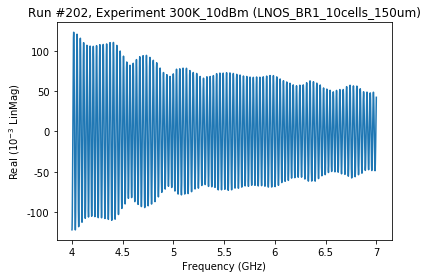

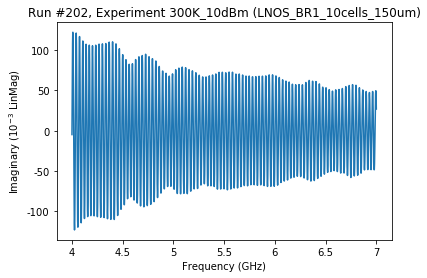

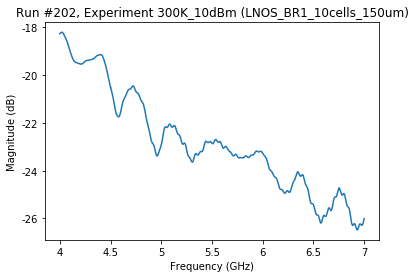

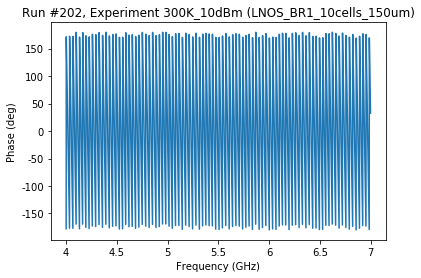

In [14]:
plot_by_id(dataid)

In [15]:
pd

{'VNA_Keysight_tr1_imaginary': {'VNA_Keysight_tr1_imaginary': array([[-0.00476812,  0.01827847,  0.04069959, ...,  0.04108222,
           0.03474069,  0.02698446]]),
  'VNA_Keysight_tr1_frequency': array([[4.000e+09, 4.001e+09, 4.002e+09, ..., 6.998e+09, 6.999e+09,
          7.000e+09]])},
 'VNA_Keysight_tr1_magnitude': {'VNA_Keysight_tr1_magnitude': array([[-18.25929642, -18.25679016, -18.25309372, ..., -26.04023552,
          -26.02319336, -26.00674438]]),
  'VNA_Keysight_tr1_frequency': array([[4.000e+09, 4.001e+09, 4.002e+09, ..., 6.998e+09, 6.999e+09,
          7.000e+09]])},
 'VNA_Keysight_tr1_phase': {'VNA_Keysight_tr1_phase': array([[-177.7636261 ,  171.39929199,  160.55831909, ...,   55.43710709,
            44.02890015,   32.60395432]]),
  'VNA_Keysight_tr1_frequency': array([[4.000e+09, 4.001e+09, 4.002e+09, ..., 6.998e+09, 6.999e+09,
          7.000e+09]])},
 'VNA_Keysight_tr1_real': {'VNA_Keysight_tr1_real': array([[-0.12209681, -0.12085065, -0.11530501, ...,  0.02830148,


### Take all traces

In [5]:
exp_name = "Full_S_Matrix_RoomTemp_with_calib" # 'VNAS21_RoomTemp_power_0dB_no_fridge'
measurement_date_month = '21-02'
sample_name = 'LNOS_DL4_20Cells_100um_sample2'

db_path = (
    os.path.join('C:\\Users\\nanospin\\Nextcloud\\Lab-Shared\\measurements\\Data', 'experiments.db'))
qc.config["core"]["db_location"] = db_path

initialise_or_create_database_at(db_path)

In [6]:
# load_or_create_experiment(exp_name, sample_name=sample_name)
new_experiment(exp_name, sample_name=sample_name)  # sometimes load_experiment gives it the wrong name (of the previous experiment)

Full_S_Matrix_RoomTemp_with_calib#LNOS_DL4_20Cells_100um_sample2#97@C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\experiments.db
-------------------------------------------------------------------------------------------------------------------------------------------

Starting experimental run with id: 122. 


([<matplotlib.axes._subplots.AxesSubplot at 0x144dabeb9c8>,
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None])

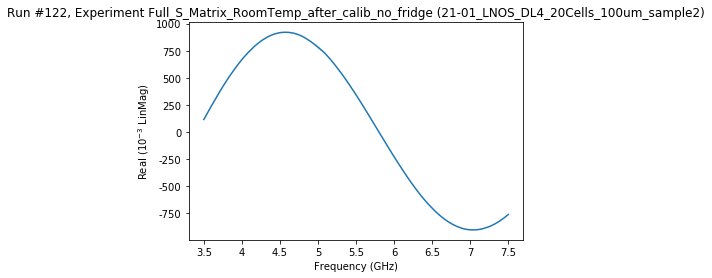

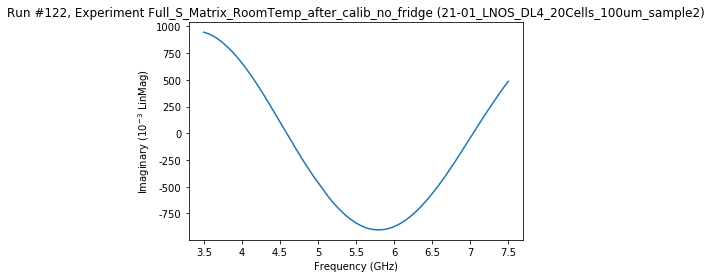

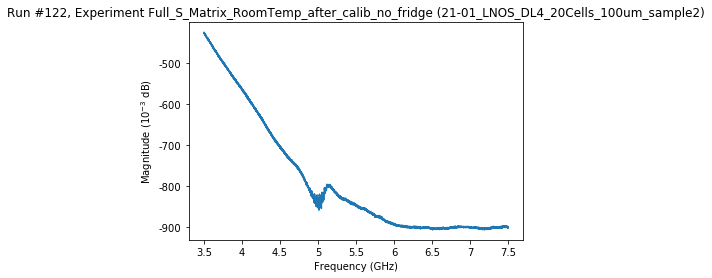

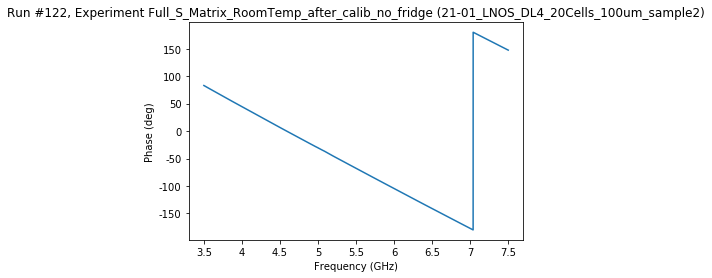

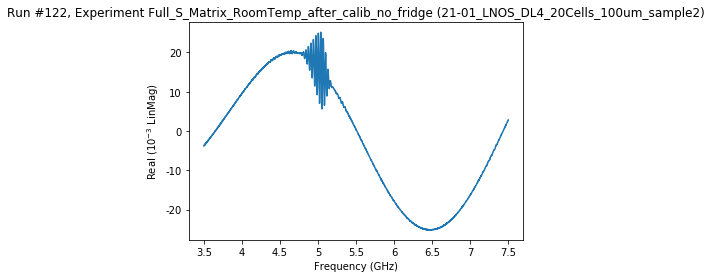

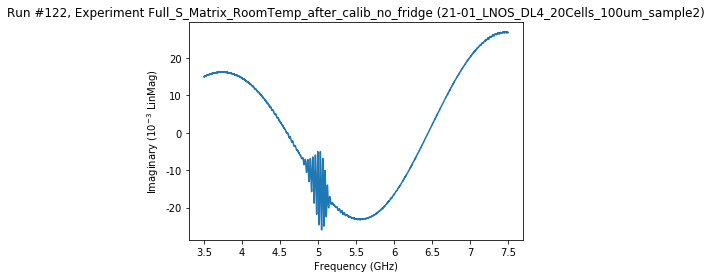

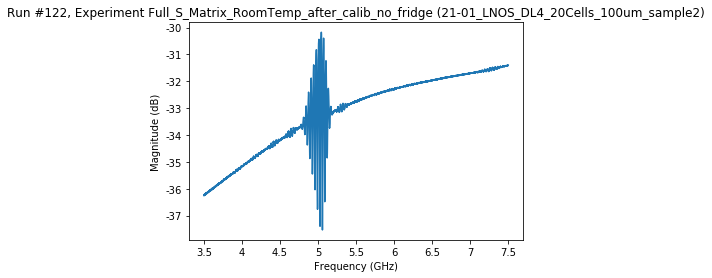

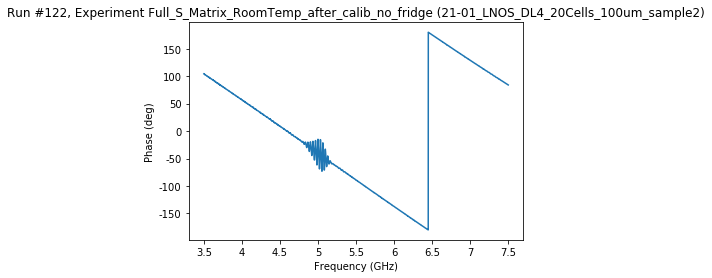

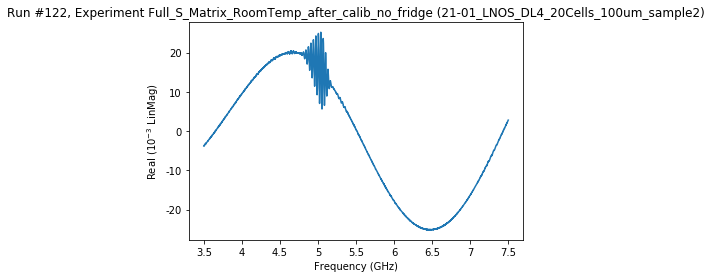

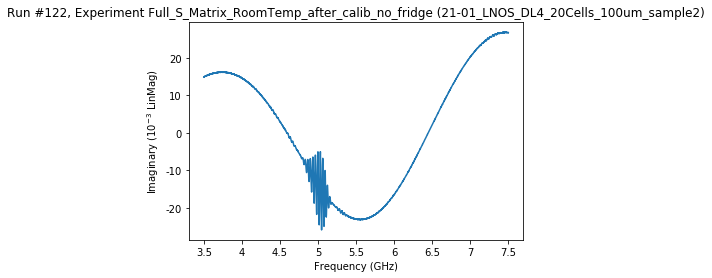

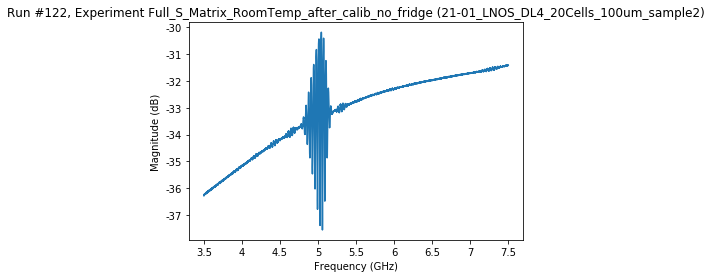

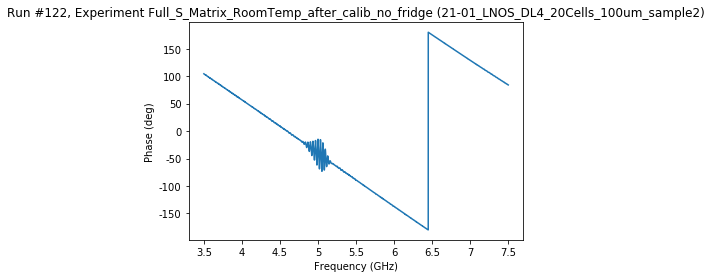

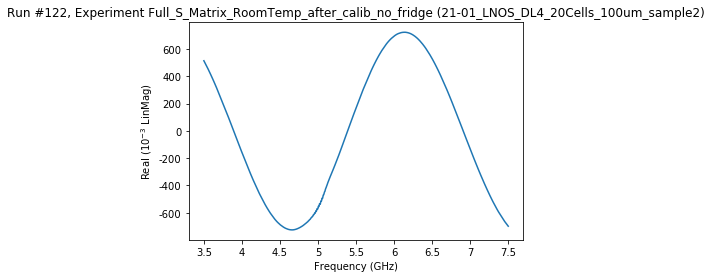

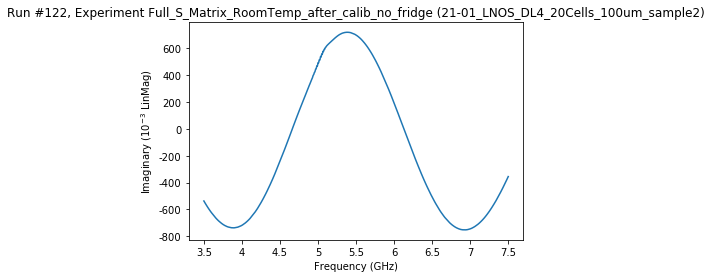

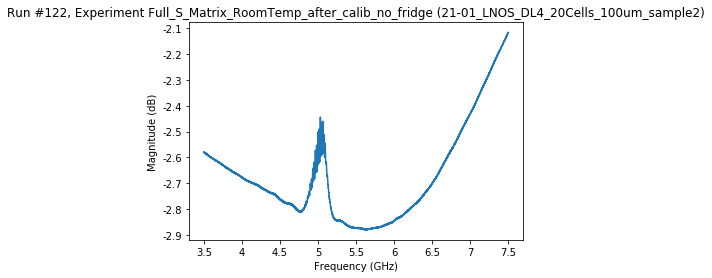

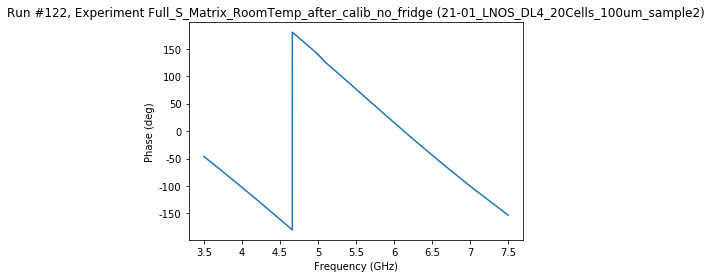

In [202]:
from qcodes import Station

station = Station()
station.add_component(vna)

meas = Measurement(station=station)  # qcodes measurement

starting_formats = []  # remember starting format

traces = vna.traces

for i, trace in enumerate(traces):
    starting_formats.append(trace.format())
    
    station.add_component(trace)  # with this you can actually retrace which trace it was (S11, ...)
    
    meas.register_parameter(trace.trace, paramtype="text")  # this is actually the label "S11, S12, ..." of the trace

    meas.register_parameter(trace.real)
    meas.register_parameter(trace.imaginary)

    meas.register_parameter(trace.magnitude)
    meas.register_parameter(trace.phase)

# actually get the data
with meas.run() as datasaver:  # try to run the measurement (? but this doesn't yet write to the database)
    data = []
    for i, trace in enumerate(traces):
        tp = trace.trace()

        imag = trace.imaginary()
        real = trace.real()

        mag = trace.magnitude()
        phase = trace.phase()

        data.append((trace.trace, tp))
        data.append((trace.imaginary, imag))
        data.append((trace.real, real))
        data.append((trace.magnitude, mag))
        data.append((trace.phase, phase))
        
        trace.format(starting_formats[i])

    datasaver.add_result(*data)
    dataid = datasaver.run_id

plot_by_id(dataid)

In [110]:
pd = datasaver.dataset.get_parameter_data()
pd

{'VNA_Keysight_tr1_magnitude': {'VNA_Keysight_tr1_magnitude': array([[-1.21727955, -1.22020507, -1.22160161, ..., -1.86916423,
          -1.86186123, -1.85454547]]),
  'VNA_Keysight_tr1_frequency': array([[3.500e+09, 3.501e+09, 3.502e+09, ..., 7.498e+09, 7.499e+09,
          7.500e+09]])},
 'VNA_Keysight_tr2_magnitude': {'VNA_Keysight_tr2_magnitude': array([[-36.15126419, -36.14162827, -36.14107513, ..., -30.52282143,
          -30.51249313, -30.49350357]]),
  'VNA_Keysight_tr2_frequency': array([[3.500e+09, 3.501e+09, 3.502e+09, ..., 7.498e+09, 7.499e+09,
          7.500e+09]])},
 'VNA_Keysight_tr3_magnitude': {'VNA_Keysight_tr3_magnitude': array([[-35.39105988, -35.39104843, -35.40148544, ..., -30.70645714,
          -30.70017052, -30.69057083]]),
  'VNA_Keysight_tr3_frequency': array([[3.500e+09, 3.501e+09, 3.502e+09, ..., 7.498e+09, 7.499e+09,
          7.500e+09]])},
 'VNA_Keysight_tr4_magnitude': {'VNA_Keysight_tr4_magnitude': array([[-3.14667344, -3.14638019, -3.14472032, ..., -

## take specific trace

In [4]:
def take_specific_trace_in_new_experiment(keysight_vna, keysight_trace_screen_number, exp_name, sample_name, plot=True): 
    new_experiment(exp_name, sample_name=sample_name) 
    
    trace = keysight_vna.traces[keysight_trace_screen_number - 1]

    from qcodes import Station

    station = Station()
    station.add_component(keysight_vna)

    meas = Measurement(station=station)  # qcodes measurement

    starting_format = trace.format()  # remember starting format
    
    station.add_component(trace)

    keysight_vna.auto_sweep(False)  # prevents from sweeping every time imaginary(), etc. is called (just take the last buffer) 
    
    meas.register_parameter(trace.real)
    meas.register_parameter(trace.imaginary)

    meas.register_parameter(trace.magnitude)
    meas.register_parameter(trace.phase)

    # actually get the data
    with meas.run() as datasaver:  # try to run the measurement (? but this doesn't yet write to the database)
        imag = trace.imaginary()
        real = trace.real()

        mag = trace.magnitude()
        phase = trace.phase()
        datasaver.add_result((trace.magnitude, mag),
                             (trace.phase, phase),
                             (trace.real, real),
                             (trace.imaginary, imag))
        dataid = datasaver.run_id

    trace.format(starting_format)  # restore starting format

    pd = datasaver.dataset.get_parameter_data()
    snapshot = datasaver.dataset.snapshot

    if plot == True: 
        plot_by_id(dataid)

### take all traces, but in different 'experiments'

In [23]:
exp_name_prefix = "S_Matrix_RoomTemp_with_calib_fine_ports_reversed_"

In [24]:
exp_name = None
measurement_date_month = '21-02'
sample_name = 'LNOS_DL4_40Cells_150um'
# load_or_create_experiment(exp_name, sample_name=sample_name)
assert exp_name is None

S_Matrix_RoomTemp_with_calib_fine_ports_reversed_S11
Starting experimental run with id: 181. 
S_Matrix_RoomTemp_with_calib_fine_ports_reversed_S21
Starting experimental run with id: 182. 
S_Matrix_RoomTemp_with_calib_fine_ports_reversed_S12
Starting experimental run with id: 183. 
S_Matrix_RoomTemp_with_calib_fine_ports_reversed_S22
Starting experimental run with id: 184. 


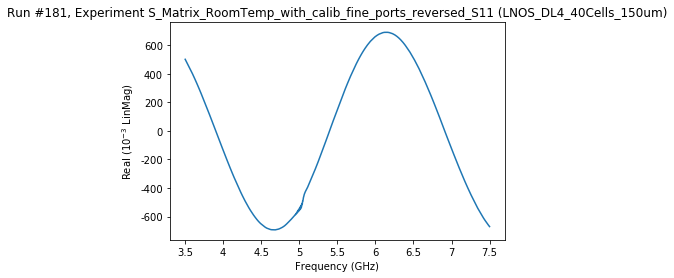

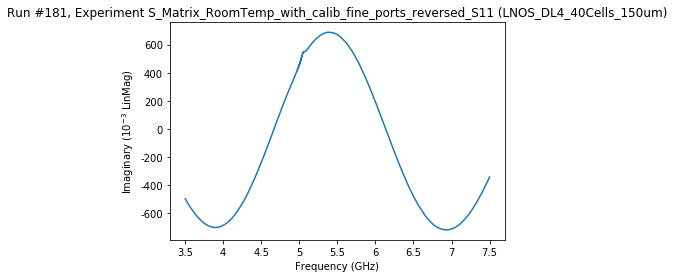

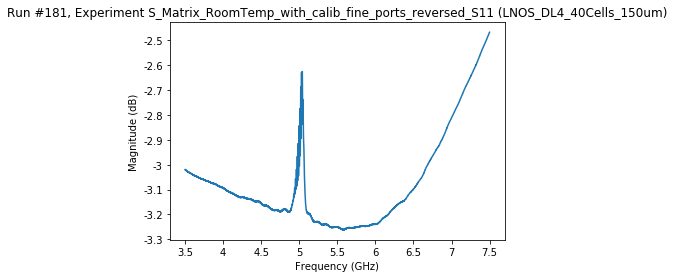

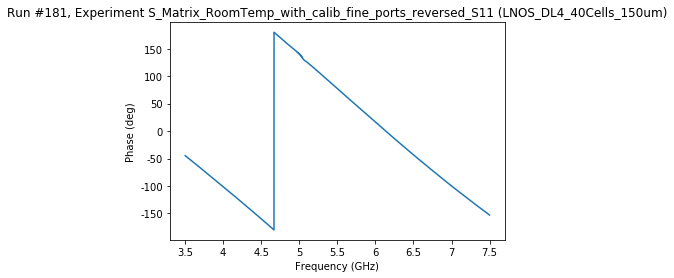

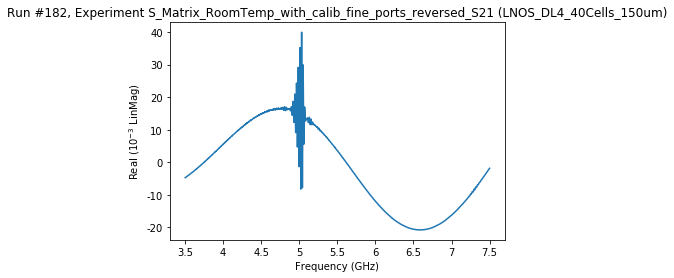

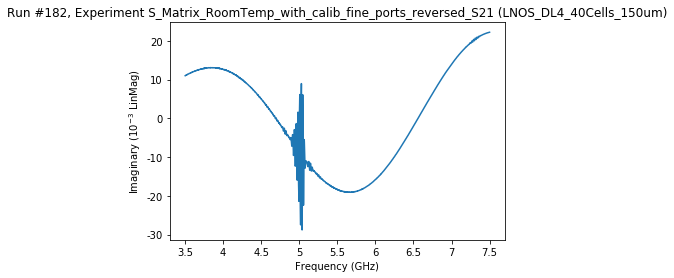

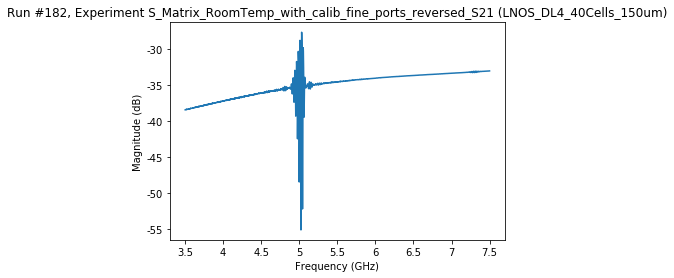

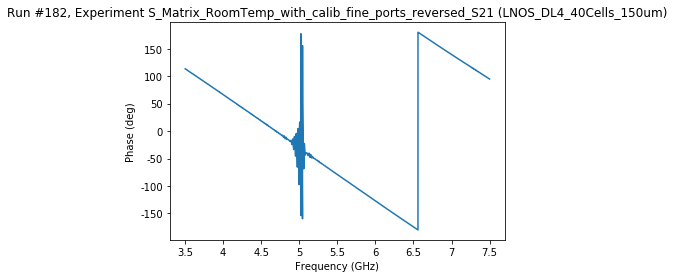

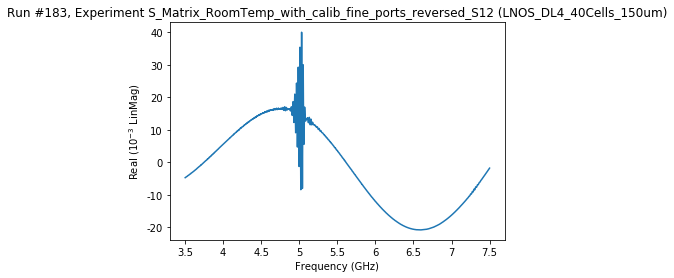

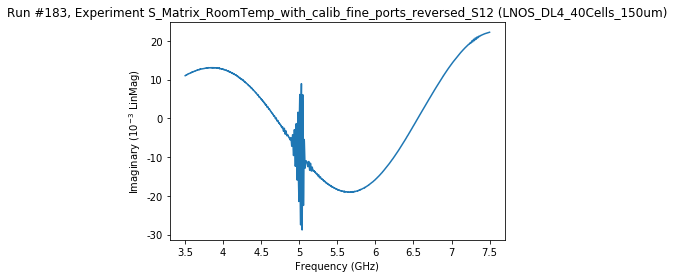

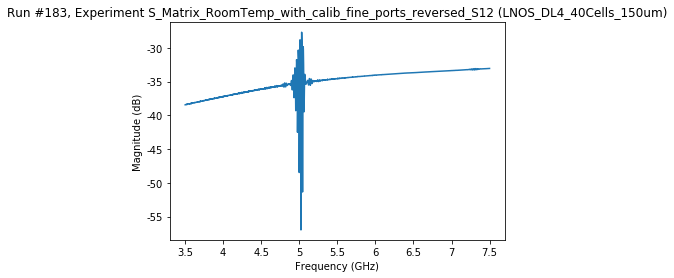

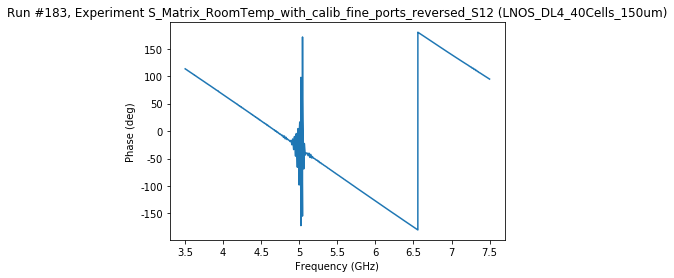

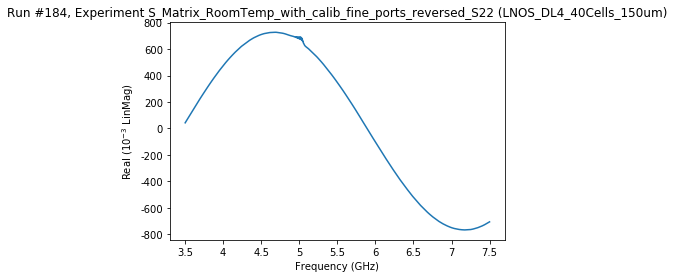

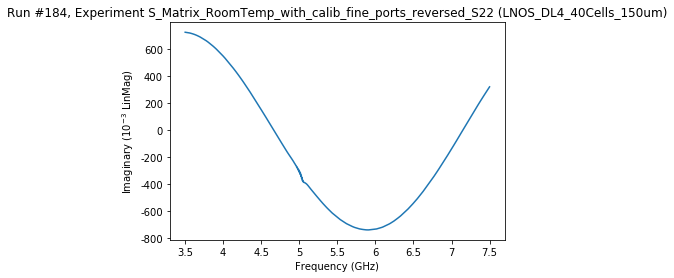

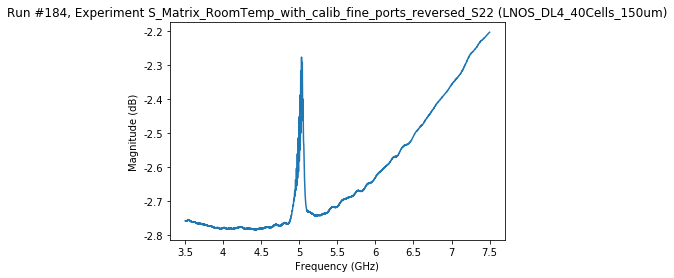

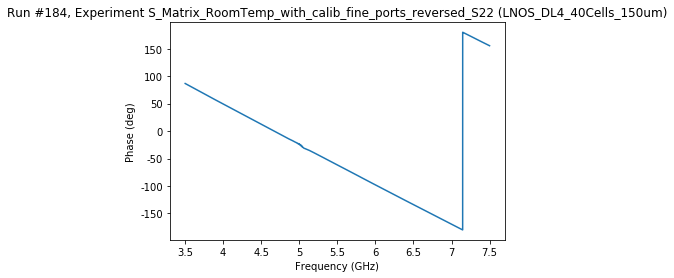

In [25]:
# define the association between trace number trace name (for experiment labeling)
assocs = [(1, "S11"), (2, "S21"), (3, "S12"), (4, "S22")]
for tup in assocs:
    keysight_trace_screen_number = tup[0]
    trace_label = tup[1]
    exp_name = exp_name_prefix + trace_label
    print(exp_name)
    take_specific_trace_in_new_experiment(vna, keysight_trace_screen_number, exp_name, sample_name, plot=True)